In [53]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
real=pd.read_csv('True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
real['label']='Real'

In [4]:
real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [5]:
fake=pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake['label']='Fake'

In [7]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [8]:
df=pd.concat([real,fake])

In [9]:
df.sample(5)

,title,text,subject,date,label
11223,Democratic presidential contender O'Malley inv...,WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"January 15, 2016",Real
20263,FBI AND CIA Host Job Fair In U.S. City With 40...,Who better to help root out terror than a pers...,left-news,"Jul 16, 2016",Fake
21586,BREAKING: GUN USED BY 5 TIME DEPORTED ILLEGAL ...,Just another interesting discovery in a story ...,left-news,"Jul 8, 2015",Fake
22202,NOTHING NEW: ‘Fake’ & Weaponized News Has Long...,In response to the establishment media s cont...,US_News,"February 21, 2017",Fake
13264,"Zimbabwe truck accident kills 21, injures others",HARARE (Reuters) - At least 21 people died in ...,worldnews,"December 3, 2017",Real


In [10]:
df.shape

(44898, 5)

In [11]:
df['label'].value_counts()

label
Fake    23481
Real    21417
Name: count, dtype: int64

In [12]:
df['label_num']=df['label'].map({
    'Fake':0,
    'Real':1
})

In [13]:
df.head()

,title,text,subject,date,label,label_num
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real,1


In [16]:
nlp=spacy.load('en_core_web_lg')

In [17]:
df['vector']=df['text'].apply(lambda x:nlp(x).vector)

In [18]:
df.head()

,title,text,subject,date,label,label_num,vector
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real,1,"[-2.14016, 0.560747, -2.6659966, 0.6522061, 4...."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real,1,"[-1.8895941, 1.2375795, -2.0175753, 0.6608604,..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real,1,"[-1.2908764, 0.7064653, -1.8089119, 0.7564296,..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real,1,"[-1.8744425, 0.2810665, -1.702931, 0.87755007,..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real,1,"[-1.8934745, -0.20982769, -1.6550169, 0.956286..."


In [29]:
X_train,X_test,y_train,y_test=train_test_split(df['vector'].values,df['label_num'],test_size=0.2,random_state=42,
                                              stratify=df['label_num'],shuffle=True)

In [30]:
X_train_2d=np.stack(X_train)
X_test_2d=np.stack(X_test)

In [31]:
X_train

array([array([-2.3841815 , -0.34112   , -1.4109471 ,  0.87444764,  5.8392186 ,
               0.6533899 ,  0.5531051 ,  3.625472  ,  0.6445772 , -1.3914438 ,
               5.4415507 ,  2.481222  , -3.5244439 ,  1.0527285 , -0.07292832,
               2.3930147 ,  2.0530791 ,  1.2219669 , -1.4491899 , -2.3043025 ,
               0.66497177, -1.1241335 , -2.1570415 ,  2.0339267 ,  0.6979314 ,
              -1.729514  , -2.0966847 , -1.1060119 , -0.32912663,  0.75659865,
               0.39629915, -0.04021033, -0.47326025, -1.9826035 , -2.3234878 ,
              -1.0108894 , -0.7667034 ,  0.9073765 ,  0.39323238,  0.01562206,
              -0.29481167,  0.10587248, -0.9489241 ,  0.15170498, -2.0480292 ,
               0.9382563 ,  1.3097959 , -1.7457106 , -0.43981805,  0.33321026,
              -1.2974876 ,  1.7455217 , -0.9916631 , -4.0017343 , -0.6982021 ,
               0.9859749 , -0.10847131,  1.2759149 ,  0.4657422 , -1.7753733 ,
               1.2721488 , -1.8299668 , -0.6365043 ,

In [32]:
X_train_2d

array([[-2.3841815 , -0.34112   , -1.4109471 , ..., -2.0051713 ,
        -2.119442  ,  0.5305868 ],
       [-2.462372  ,  0.4224927 , -1.8455247 , ..., -1.2075253 ,
        -1.6737398 ,  0.3155784 ],
       [-1.5535562 ,  1.6090466 , -2.5841737 , ..., -0.3789612 ,
        -3.122921  ,  1.3549435 ],
       ...,
       [-1.7381599 ,  1.3184955 , -2.4884872 , ..., -0.4596332 ,
        -2.8808882 ,  1.123029  ],
       [-1.5108258 ,  1.5507323 , -1.9549472 , ..., -0.87471175,
        -3.0674431 ,  0.243521  ],
       [-1.7394289 ,  0.15762083, -1.7160317 , ..., -1.2991531 ,
        -2.5471036 ,  1.0668306 ]], dtype=float32)

In [33]:
X_train.shape

(35918,)

In [34]:
X_test.shape

(8980,)

In [35]:
y_train.value_counts()

label_num
0    18785
1    17133
Name: count, dtype: int64

In [36]:
y_test.value_counts()

label_num
0    4696
1    4284
Name: count, dtype: int64

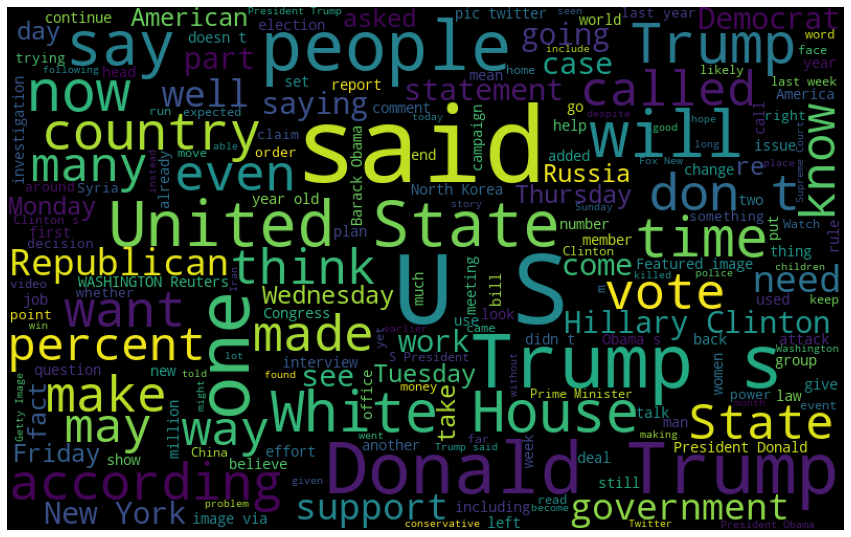

In [40]:
plt.figure(figsize=(15,13))
all_words=' '.join(df['text'].tolist())
wordcloud_all=WordCloud(height=500,width=800,random_state=101,max_font_size=100).generate(all_words)
plt.imshow(wordcloud_all)
plt.axis('off')
plt.show()

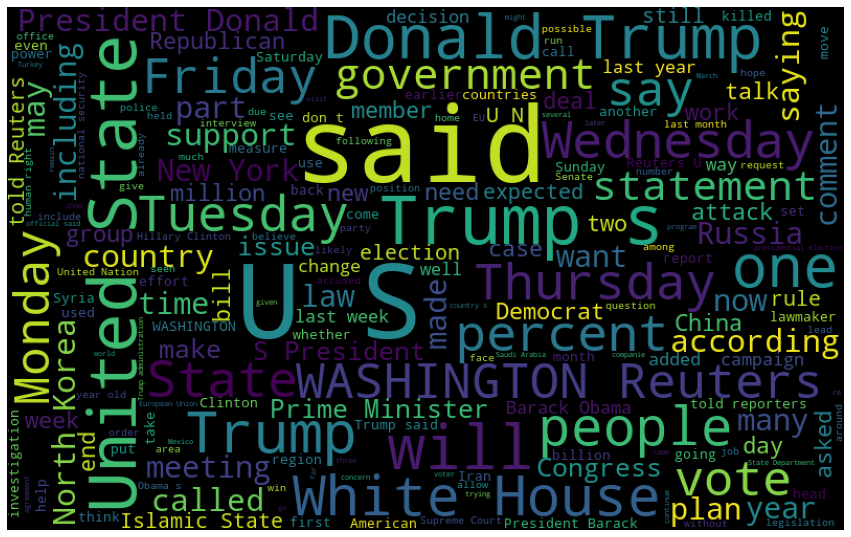

In [42]:
plt.figure(figsize=(15,13))
real_sen=' '.join([sentence for sentence in df['text'][df['label']=='Real']])
wordcloud_real=WordCloud(height=500,width=800,random_state=101,max_font_size=100).generate(real_sen)
plt.imshow(wordcloud_real)
plt.axis('off')
plt.show()

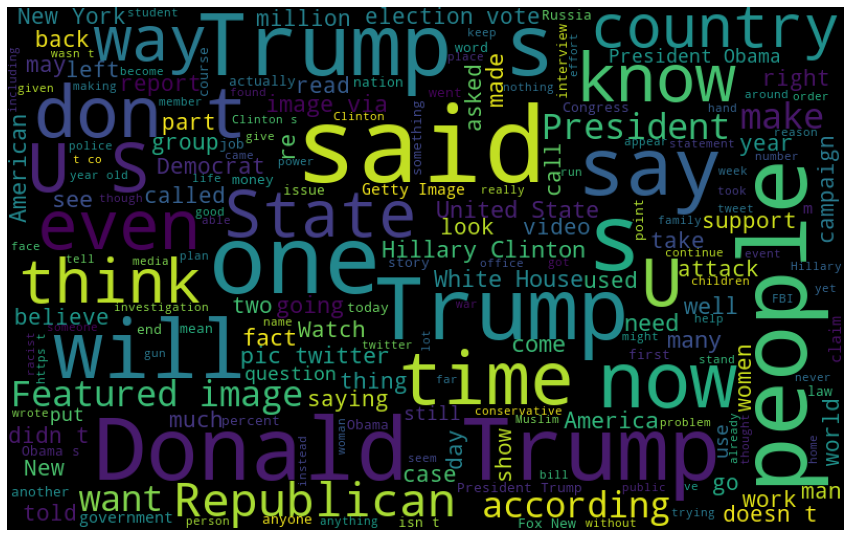

In [43]:
plt.figure(figsize=(15,13))
fake_sen=' '.join(df['text'][df['label']=='Fake'])
wordcloud_fake=WordCloud(height=500,width=800,random_state=101,max_font_size=100).generate(fake_sen)
plt.imshow(wordcloud_fake)
plt.axis('off')
plt.show()

In [45]:
scaler=MinMaxScaler()

In [46]:
scaled_train_embed=scaler.fit_transform(X_train_2d)
scaled_test_embed=scaler.transform(X_test_2d)

In [47]:
scaled_train_embed

array([[0.25444478, 0.42414916, 0.37283996, ..., 0.2943966 , 0.43518355,
        0.65980697],
       [0.24515262, 0.50226563, 0.35207656, ..., 0.38949984, 0.47348154,
        0.64003754],
       [0.3531562 , 0.6236484 , 0.31678513, ..., 0.48828945, 0.34895736,
        0.7356044 ],
       ...,
       [0.33121794, 0.5939254 , 0.32135686, ..., 0.47867095, 0.36975455,
        0.7142805 ],
       [0.3582343 , 0.61768293, 0.34684855, ..., 0.42918116, 0.35372442,
        0.63341206],
       [0.33106714, 0.47516963, 0.35826352, ..., 0.3785751 , 0.39843577,
        0.7091132 ]], dtype=float32)

In [49]:
nb=MultinomialNB()
nb.fit(scaled_train_embed,y_train)

MultinomialNB()

In [51]:
y_pred=nb.predict(scaled_test_embed)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4696
           1       0.83      0.89      0.86      4284

    accuracy                           0.86      8980
   macro avg       0.87      0.87      0.86      8980
weighted avg       0.87      0.86      0.86      8980



In [54]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train_2d,y_train)

KNeighborsClassifier(metric='euclidean')

In [55]:
y_pred2=knn.predict(X_test_2d)

In [56]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4696
           1       0.97      0.97      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



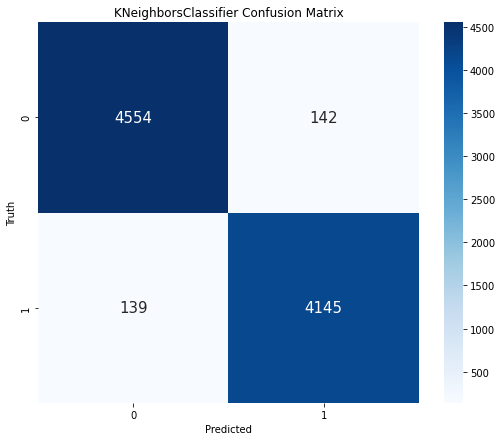

In [57]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('KNeighborsClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()